In [1]:
%pip install iwidgets ipympl

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
ERROR: Could not find a version that satisfies the requirement iwidgets (from versions: none)
ERROR: No matching distribution found for iwidgets
Note: you may need to restart the kernel to use updated packages.


# Calculating the Area Under a Curve Using Integrals

## Introduction

Welcome to this lesson on integrals! Today, we'll explore how to calculate the area under a curve between two points, $ a $ and $ b $. We'll start by approximating the area using rectangles and then introduce the concept of the integral to find the exact area.

---

## The Concept of Area Under a Curve

Calculating the area under a curve is a fundamental concept in calculus. It has numerous applications in physics, engineering, economics, and other fields. The idea is to find the total area between the curve of a function $ f(x) $ and the $ x $-axis, from $ x = a $ to $ x = b $.

---

## Approximating the Area with Rectangles

One intuitive way to approximate this area is by dividing the interval $$[a, b]$$ into smaller subintervals and approximating the area under the curve over each subinterval with a rectangle.

### Dividing $([a, b])$ into Rectangles

Suppose we divide the interval $([a, b])$ into $( n )$ equal subintervals, each of width:

$
\Delta x = \frac{b - a}{n}
$

### Calculating the Area of Rectangles

For each subinterval, we choose a sample point $( x_i )$ (we'll use the left endpoints) and calculate the height of the rectangle as $( f(x_i) )$. The area of each rectangle is then $ f(x_i) \Delta x $.

The total approximate area is the sum of the areas of all rectangles:

$
\text{Approximate Area} = \sum_{i=1}^{n} f(x_i) \Delta x
$

---

### Code Example: Approximating the Area Under $ f(x) = x^2 $

Let's write some Python code to visualize this approximation.

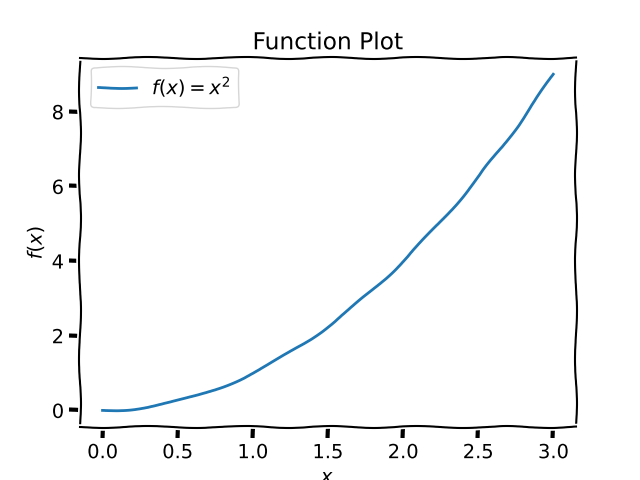

In [2]:
import logging

import matplotlib.pyplot as plt
import numpy as np

logging.getLogger("matplotlib.font_manager").setLevel(logging.ERROR)
%matplotlib widget

# Use xkcd style for hand-drawn effect
plt.xkcd()


# Define the function
def f(x):
    return x**2
    # return np.sin(x)


def f_antiderivative(x):
    return x**3 / 3
    # return -np.cos(x)


function_label = "$f(x) = x^2$"
# function_label = "$f(x) = sin(x)$"

# Interval [a, b]
a = 0
b = 3

# Plotting the function
X = np.linspace(a, b, 100)
plt.figure()
plt.plot(X, f(X), label=function_label)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Function Plot")
plt.legend()
plt.show()

---

Now, let's approximate the area under the curve using $ n = 5 $ rectangles.

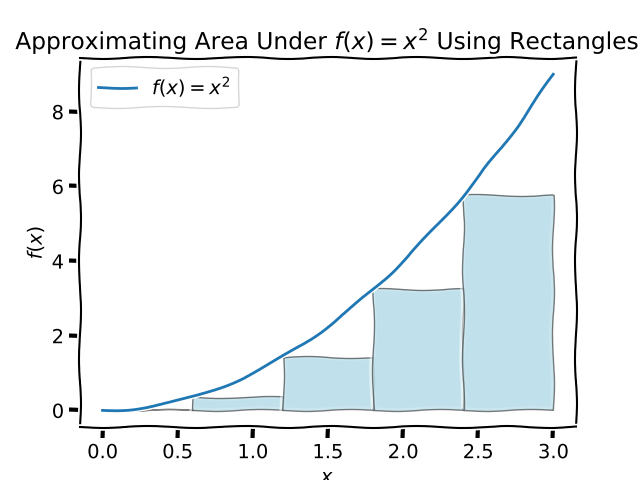

In [3]:
# Number of rectangles
n = 5

# Width of each rectangle
dx = (b - a) / n

# Sample points (left endpoints)
x = np.linspace(a, b - dx, n)
heights = f(x)

# Plotting
fig, ax = plt.subplots()
ax.plot(X, f(X), label=function_label)

# Draw rectangles
for i in range(n):
    xi = x[i]
    rect = plt.Rectangle(
        (xi, 0),
        dx,
        heights[i],
        edgecolor="black",
        facecolor="lightblue",
        alpha=0.5,
    )
    ax.add_patch(rect)

ax.set_xlabel("$x$")
ax.set_ylabel("$f(x)$")
ax.set_title("Approximating Area Under $f(x) = x^2$ Using Rectangles")
ax.legend()
plt.show()

---

## Making the Rectangles Smaller

By increasing the number of rectangles $( n )$, we can make the approximation more accurate. As $ n$ approaches infinity, the approximation becomes exact.

### The Idea of Limits

The exact area under the curve is defined as:

$
\text{Exact Area} = \lim_{n \to \infty} \sum_{i=1}^{n} f(x_i) \Delta x
$

---

### Code Example: Improving the Approximation

Let's see how the approximation improves as we increase $ n $.

In [4]:
import ipywidgets as widgets


@widgets.interact(n=(1, 100, 1))
def update(n=5):
    dx = (b - a) / n
    x = np.linspace(a, b - dx, n)
    heights = f(x)

    with plt.xkcd():
        fig, ax = plt.subplots()
        ax.plot(X, f(X), label=function_label)

        # Draw rectangles
        for i in range(n):
            xi = x[i]
            rect = plt.Rectangle(
                (xi, 0),
                dx,
                heights[i],
                edgecolor="black",
                facecolor="lightblue",
                alpha=0.5,
            )
            ax.add_patch(rect)

        ax.set_xlabel("$x$")
        ax.set_ylabel("$f(x)$")
        ax.set_title(f"Approximating Area with n={n} Rectangles")
        ax.legend()
        plt.show()

interactive(children=(IntSlider(value=5, description='n', min=1), Output()), _dom_classes=('widget-interact',)…

---

## Introducing the Integral

The definite integral of $ f(x) $ from $ a $ to $ b $ is defined as:

$
\int_{a}^{b} f(x) \, dx = \lim_{n \to \infty} \sum_{i=1}^{n} f(x_i) \Delta x; \Delta x=\frac{b-a}{n}
$

This integral gives the exact area under the curve $ f(x) $ from $ x = a $ to $ x = b $.

## Fundamental Theorem of Calculus

The **Fundamental Theorem of Calculus** connects differentiation (finding derivatives) and integration (finding antiderivatives). It has two main parts:

### Part 1

If $ F(x) $ is an antiderivative of $ f(x) $ on an interval $[a, b]$, then the definite integral of $ f(x) $ from $ a $ to $ b $ is:

$
\int_{a}^{b} f(x) \, dx = F(b) - F(a)
$

This means that to find the exact area under the curve $ f(x) $ from $ a $ to $ b $, you can simply find any antiderivative $ F(x) $ of $ f(x) $, evaluate it at the bounds $ b $ and $ a $, and subtract.

### Part 2

If $ f(x) $ is continuous on $[a, b]$, then $ f(x) $ has an antiderivative on $[a, b]$.

### Why This Matters

- **Efficiency:** Instead of summing infinitely many infinitesimally small rectangles (as in Riemann sums), you can find the exact area using antiderivatives.
- **Conceptual Understanding:** It bridges the gap between the discrete approximation of areas and the continuous exact area.


### Rendered Markdown

## Proving the Fundamental Theorem of Calculus

The **Fundamental Theorem of Calculus (FTC)** is a cornerstone of calculus that bridges the concepts of differentiation and integration. It consists of two main parts:

1. **FTC Part 1:** Relates the definite integral of a function to its antiderivative.
2. **FTC Part 2:** Ensures the existence of antiderivatives for continuous functions.

In this section, we'll provide a step-by-step proof of both parts of the Fundamental Theorem of Calculus.

---

### **Fundamental Theorem of Calculus - Part 1**

**Statement:**

If $ F(x) $ is an antiderivative of $ f(x) $ on an interval $[a, b]$, then:

$
\int_{a}^{b} f(x) \, dx = F(b) - F(a)
$

**Proof:**

1. **Define the Definite Integral:**

   The definite integral $ \int_{a}^{b} f(x) \, dx $ represents the area under the curve $ f(x) $ from $ x = a $ to $ x = b $.

2. **Consider the Antiderivative:**

   Since $ F(x) $ is an antiderivative of $ f(x) $, we have:

   $
   F'(x) = f(x)
   $

3. **Apply the Mean Value Theorem for Integrals:**

   The Mean Value Theorem states that if $ f $ is continuous on $[a, b]$, then there exists some $ c \in [a, b] $ such that:

   $
   \int_{a}^{b} f(x) \, dx = f(c) (b - a)
   $




In [5]:
from scipy.integrate import quad
from scipy.optimize import fsolve

# Interval [a, b]


# Function to find c given a and b
def find_c(a, b, f):
    # Calculate the definite integral
    definite_integral, _ = quad(f, a, b)

    # Calculate the average value A
    A = definite_integral / (b - a)

    # Define the equation f(c) - A = 0
    def equation(c):
        return f(c) - A

    # Initial guess for c
    c_initial_guess = (a + b) / 2

    # Solve for c
    (c_solution,) = fsolve(equation, c_initial_guess)

    # Ensure c is within [a, b]
    if a <= c_solution <= b:
        return c_solution, A
    else:
        return None, A


@widgets.interact(a=(0, 3, 0.1), b=(3, 4, 0.1))
def update_mean(a, b):
    # Calculate the definite integral
    definite_integral = f_antiderivative(b) - f_antiderivative(
        a
    )  # (b**3) / 3 - (a**3) / 3  # 9

    # Calculate the average value
    average_value = definite_integral / (b - a)  # 3

    # Find c such that f(c) = average_value
    # c = np.sqrt(average_value)  # sqrt(3) ≈ 1.732

    c, average_value = find_c(a, b, f)

    # Create x values
    x = np.linspace(a, b, 400)
    y = f(x)

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=function_label, color="blue")

    # Shade the area under the curve
    plt.fill_between(
        x, y, color="lightblue", alpha=0.5, label="Area under $f(x)$"
    )

    # Draw the rectangle representing f(c)*(b - a)
    plt.bar(
        a,
        average_value,
        width=b - a,
        alpha=0.3,
        color="orange",
        edgecolor="red",
        align="edge",
        label=f"Rectangle with height f(c)={average_value:.2f}",
    )

    # Plot the point c
    plt.plot(c, f(c), "ro", label=f"Point c ≈ {c:.2f}")

    # Annotate the point c
    plt.annotate(
        f"c ≈ {c:.2f}",
        xy=(c, f(c)),
        xytext=(c + 0.5, f(c) + 2),
        arrowprops=dict(facecolor="black", shrink=0.05),
        fontsize=12,
        color="red",
    )

    # Labels and Title
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.title("Mean Value Theorem for Integrals Illustration")
    plt.legend()
    plt.grid(True)
    plt.xlim(a - 0.5, b + 0.5)
    plt.ylim(0, max(y) + 5)

    plt.show()

interactive(children=(FloatSlider(value=1.0, description='a', max=3.0), FloatSlider(value=3.0, description='b'…

### **Proof of the Mean Value Theorem for Integrals**

To prove this theorem, we'll utilize the **Extreme Value Theorem**, which states that a continuous function on a closed interval $[a, b]$ attains both its maximum and minimum values.

**Step 1: Identify Maximum and Minimum Values**

Since $ f(x) $ is continuous on $[a, b]$, by the Extreme Value Theorem, there exist points $ x_{\text{max}} $ and $ x_{\text{min}} $ in $[a, b]$ such that:

$
f(x_{\text{max}}) = \max_{x \in [a, b]} f(x)
$
$
f(x_{\text{min}}) = \min_{x \in [a, b]} f(x)
$

**Step 2: Establish Inequalities**

For all $ x $ in $[a, b]$:

$
f(x_{\text{min}}) \leq f(x) \leq f(x_{\text{max}})
$

**Step 3: Integrate the Inequalities**

Integrate all parts of the inequality over $[a, b]$:

$
\int_{a}^{b} f(x_{\text{min}}) \, dx \leq \int_{a}^{b} f(x) \, dx \leq \int_{a}^{b} f(x_{\text{max}}) \, dx
$

Simplify the integrals:

$
f(x_{\text{min}}) \cdot (b - a) \leq \int_{a}^{b} f(x) \, dx \leq f(x_{\text{max}}) \cdot (b - a)
$

**Step 4: Apply the Intermediate Value Theorem**

Define the average value $ A $ of $ f(x) $ on $[a, b]$:

$
A = \frac{1}{b - a} \int_{a}^{b} f(x) \, dx
$

From the inequalities:

$
f(x_{\text{min}}) \leq A \leq f(x_{\text{max}})
$

Since $ f(x) $ is continuous on $[a, b]$ and $ A $ lies between the minimum and maximum values of $ f(x) $, by the **Intermediate Value Theorem**, there exists at least one point $ c $ in $(a, b)$ such that:

$
f(c) = A
$

**Step 5: Substitute Back to Original Statement**

Multiplying both sides by $ (b - a) $:

$
f(c) \cdot (b - a) = \int_{a}^{b} f(x) \, dx
$

Thus, we have:

$
\int_{a}^{b} f(x) \, dx = f(c) \cdot (b - a)
$

This completes the proof of the **Mean Value Theorem for Integrals**.

---

## Proving the Limit of Riemann Sums Using the Mean Value Theorem for Integrals

Riemann Sums are fundamental tools in calculus for approximating the area under a curve, which is represented by a definite integral. The **Mean Value Theorem for Integrals** provides a bridge between these approximations and the exact value of the integral. In this section, we'll explore how the Mean Value Theorem can be used to prove that the limit of Riemann Sums converges to the definite integral.

### **Overview**

1. **Riemann Sums**: Methods for approximating definite integrals by summing areas of rectangles under a curve.
2. **Mean Value Theorem for Integrals**: Guarantees the existence of at least one point where the function attains its average value over an interval.
3. **Proof Strategy**: Utilize the Mean Value Theorem to establish that as the number of rectangles increases, the Riemann Sum approaches the definite integral.

---

### **1. Understanding Riemann Sums**

**Riemann Sums** approximate the area under a curve $ f(x) $ over an interval $[a, b]$ by dividing the interval into $ n $ subintervals of equal width and summing up the areas of rectangles formed over these subintervals.

#### **Types of Riemann Sums:**

- **Left Riemann Sum**: Uses the left endpoint of each subinterval for the rectangle's height.
- **Right Riemann Sum**: Uses the right endpoint.
- **Midpoint Riemann Sum**: Uses the midpoint of each subinterval.

#### **Mathematical Definition:**

Given a function $ f(x) $ \text{continuous on} $[a, b]$, divide the interval into $ n $ subintervals of equal width:

$
\Delta x = \frac{b - a}{n}
$

Choose a sample point $ x_i^* $ in each subinterval $[x_{i-1}, x_i]$, then the Riemann Sum is:

$
S_n = \sum_{i=1}^{n} f(x_i^*) \Delta x
$

As $ n \to \infty $, $ S_n $ approaches the definite integral:

$
\int_{a}^{b} f(x) \, dx = \lim_{n \to \infty} S_n
$

---

### **2. Mean Value Theorem for Integrals**

**Statement:**

If $ f(x) $ is continuous on the closed interval $[a, b]$, then there exists at least one point $ c $ in $(a, b)$ such that:

$
\int_{a}^{b} f(x) \, dx = f(c) \cdot (b - a)
$

**Interpretation:**

This theorem states that the total area under $ f(x) $ from $ a $ to $ b $ is equal to the area of a rectangle with width $ (b - a) $ and height equal to the function's average value over that interval.

---

### **3. Proof: Limit of Riemann Sums Using the Mean Value Theorem**

**Objective:**

Prove that as the number of rectangles $ n $ increases, the Riemann Sum $ S_n $ converges to the definite integral $ \int_{a}^{b} f(x) \, dx $, utilizing the Mean Value Theorem for Integrals.

**Assumptions:**

- $ f(x) $ is continuous on $[a, b]$.

**Proof Steps:**

1. **Divide the Interval:**

   Divide $[a, b]$ into $ n $ subintervals of equal width:

   $
   \Delta x = \frac{b - a}{n}
   $
   
   The endpoints of the subintervals are:

   $
   x_0 = a, \quad x_1 = a + \Delta x, \quad x_2 = a + 2\Delta x, \quad \ldots, \quad x_n = b
   $

2. **Express the Riemann Sum:**

   The Riemann Sum $ S_n $ can be written as:

   $
   S_n = \sum_{i=1}^{n} f(x_i^*) \Delta x
   $
   
   where $ x_i^* $ is a sample point in $[x_{i-1}, x_i]$.

3. **Apply the Mean Value Theorem for Integrals to Each Subinterval:**

   For each subinterval $[x_{i-1}, x_i]$, by the Mean Value Theorem for Integrals, there exists a point $ c_i \in (x_{i-1}, x_i) $ such that:

   $
   \int_{x_{i-1}}^{x_i} f(x) \, dx = f(c_i) \Delta x
   $
   
4. **Sum Over All Subintervals:**

   Summing the above expression over all $ n $ subintervals:

   $
   \sum_{i=1}^{n} \int_{x_{i-1}}^{x_i} f(x) \, dx = \sum_{i=1}^{n} f(c_i) \Delta x
   $
   
   Simplifying the left-hand side:

   $
   \int_{a}^{b} f(x) \, dx = \sum_{i=1}^{n} f(c_i) \Delta x
   $
   
   Therefore:

   $
   \int_{a}^{b} f(x) \, dx = S_n
   $
   
5. **Taking the Limit as $ n \to \infty $:**

   As $ n $ increases, $ \Delta x $ decreases, and the points $ c_i $ become dense in $[a, b]$. Therefore, the Riemann Sum $ S_n $ approaches the definite integral:

   $
   \int_{a}^{b} f(x) \, dx = \lim_{n \to \infty} S_n
   $
   
   This completes the proof that the limit of the Riemann Sums converges to the definite integral, utilizing the Mean Value Theorem for Integrals.

---

   

4. **Partition the Interval:**

   Divide the interval $[a, b]$ into $ n $ subintervals of equal width $ \Delta x = \frac{b - a}{n} $.

5. **Construct Riemann Sums:**

   The definite integral is the limit of Riemann sums as $ n \to \infty $:

   $
   \int_{a}^{b} f(x) \, dx = \lim_{n \to \infty} \sum_{i=1}^{n} f(x_i^*) \Delta x
   $

   where $ x_i^* $ is a sample point in the $ i $-th subinterval.

6. **Relate to the Antiderivative:**

   Notice that:

   $
   F(b) - F(a) = F(a + n\Delta x) - F(a) = \sum_{i=1}^{n} [F(a + i\Delta x) - F(a + (i-1)\Delta x)]
   $

   This telescopes to:

   $
   F(b) - F(a) = \sum_{i=1}^{n} F'(c_i) \Delta x
   $

   where $ c_i $ is some point in the $ i $-th subinterval (by the Mean Value Theorem for Differentiation).

7. **Combine the Results:**

   Since $ F'(c_i) = f(c_i) $, we have:

   $
   F(b) - F(a) = \sum_{i=1}^{n} f(c_i) \Delta x
   $

   Taking the limit as $ n \to \infty $:

   $
   F(b) - F(a) = \lim_{n \to \infty} \sum_{i=1}^{n} f(c_i) \Delta x = \int_{a}^{b} f(x) \, dx
   $

8. **Conclusion:**

   Therefore,

   $
   \int_{a}^{b} f(x) \, dx = F(b) - F(a)
   $

   This completes the proof of **FTC Part 1**.

---

### **Fundamental Theorem of Calculus - Part 2**

**Statement:**

If $ f(x) $ is continuous on $[a, b]$, then $ f(x) $ has an antiderivative on $[a, b]$.

**Proof:**

1. **Define a Function Using the Integral:**

   Define $ F(x) $ as follows:

   $
   F(x) = \int_{a}^{x} f(t) \, dt
   $

   Here, $ F(x) $ represents the area under $ f(t) $ from $ t = a $ to $ t = x $.

2. **Show Continuity of $ F(x) $:**

   Since $ f(x) $ is continuous on $[a, b]$, the integral $ F(x) $ is continuous on $[a, b]$.

3. **Differentiate $ F(x) $:**

   Using the definition of the derivative:

   $
   F'(x) = \lim_{h \to 0} \frac{F(x + h) - F(x)}{h}
   $

   Substitute $ F(x + h) $ and $ F(x) $:

   $
   F'(x) = \lim_{h \to 0} \frac{\int_{a}^{x+h} f(t) \, dt - \int_{a}^{x} f(t) \, dt}{h} = \lim_{h \to 0} \frac{\int_{x}^{x+h} f(t) \, dt}{h}
   $

4. **Apply the Mean Value Theorem for Integrals:**

   Since $ f(t) $ is continuous on $[x, x+h]$, there exists a point $ c \in [x, x+h] $ such that:

   $
   \int_{x}^{x+h} f(t) \, dt = f(c) \cdot h
   $

5. **Simplify the Derivative:**

   Substitute back into the expression for $ F'(x) $:

   $
   F'(x) = \lim_{h \to 0} \frac{f(c) \cdot h}{h} = \lim_{h \to 0} f(c) = f(x)
   $

   (As $ h \to 0 $, $ c \to x $ because $ c $ is in $[x, x+h]$ and $ f $ is continuous at $ x $).

6. **Conclusion:**

   Therefore, $ F'(x) = f(x) $, which means $ F(x) $ is an antiderivative of $ f(x) $ on $[a, b]$.

   This completes the proof of **FTC Part 2**.

---

### **Summary of the Fundamental Theorem of Calculus**

- **FTC Part 1** allows us to compute the definite integral of a function using its antiderivative.
- **FTC Part 2** guarantees the existence of an antiderivative for continuous functions, ensuring that **FTC Part 1** can be applied.

Together, these two parts provide a powerful link between differentiation and integration, simplifying the process of finding areas under curves and solving a wide range of problems in calculus.

---

### Calculating the Integral

For $ f(x) = x^2 $, the definite integral from $ a = 0 $ to $ b = 3 $.

Because the $f'(\frac{x^3}3) = x^2$

$
\int_{0}^{3} x^2 \, dx = \left[ \frac{x^3}{3} \right]_{0}^{3} = \frac{3^3}{3} - \frac{0^3}{3} = \frac{27}{3} - 0 = 9
$



---

### Code Example: Calculating the Exact Area

Let's verify this using Python.

In [6]:
from scipy.integrate import quad

# Compute the integral
area, error = quad(f, a, b)
print(f"The exact area under f(x) from {a} to {b} is {area}")

The exact area under f(x) from 0 to 3 is 9.000000000000002


---

## Conclusion

We have seen how to approximate the area under a curve using rectangles and how increasing the number of rectangles improves the approximation. The concept of the integral allows us to find the exact area under the curve by taking the limit as the number of rectangles approaches infinity.

---

**Try experimenting with different functions and intervals to deepen your understanding of integrals and area approximation!**

Changing this:
```
def f(x):
    return x**2
```
into something you like
```
def f(x):
    return np.sin(x)
```
and change the f_antiderivative into
```
def f_antiderivative(x):
    return -np.cos(x)
```
and also the name of the function